In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
sys.path.insert(0,'../rl_network/'); import ac
sys.path.insert(0,'../memory/'); import episodic as ec
sys.path.insert(0,'../environments/'); import gw; import gridworld_plotting as gp

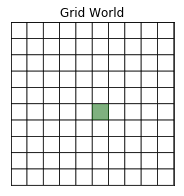

In [23]:
import experiment as expt
import torch
import uuid
import csv
import pickle 


reload(gw)
rows, columns = 10,10
env_type = None
penalty = -0.01 

NUM_TRIALS = 50000
NUM_EVENTS = 250


reward_location = (5,5)
env = gw.GridWorld(rows=rows,cols=columns,env_type=env_type,
                       rewards = {reward_location:1},
                       step_penalization=penalty,
                       rho=0.0,
                       rewarded_action=None, barheight=10)
    
fig = gw.plotWorld(env, scale=0.3, four_actions=True)

In [24]:
agent_params = {
    'load_model':  False,
    'load_dir':    f'../data/outputs/gridworld/weights/8ab3822b-28ad-4751-950f-20f0475507a9.pt',
    'freeze_w':    False,

    'input_dims':  (1,1, np.prod(env.observation[0].shape)),
    'action_dims': len(env.action_list),
    'hidden_types':['conv', 'pool', 'conv', 'pool','linear','linear'],
    'hidden_dims': [None,None,None, None,100, 400],
    'use_SR':      True,

    'rfsize':      1,
    'padding':     0,

    'gamma':       0.98,
    'eta':         5e-4,

    'use_EC':      False,
    'EC':          {},
    'cachelim':    300
    }

In [25]:
agent = ac.make_agent(agent_params)
data = {'total_reward': [],
        'loss': [[],[],[]],
        'trial_length': [],
        'trials_run_to_date':0,
        'pol_tracking':[],
        'val_tracking':[],
        'ec_tracking': [],
        't': [],
        'mfcs':[]
       }

In [26]:
mem_temp = 0.05 
ex = expt.test_expt(agent, env, use_mem=agent_params['use_EC'], mem_temp=mem_temp)

In [31]:
ex.run(1000, NUM_EVENTS, data)

0: -0.05000000000000071 (0.2370443344116211s)
100: 0.75 (38.339723348617554s)
200: -1.479999999999991 (44.405436277389526s)
300: -2.4999999999999907 (38.724528551101685s)
400: 0.75 (38.25691556930542s)
500: 0.22999999999999954 (42.11557459831238s)
600: -2.4999999999999907 (41.54427766799927s)
700: 0.95 (37.9624981880188s)
800: 0.99 (42.088003635406494s)
900: -0.5500000000000012 (43.27364134788513s)
999: 0.89 (36.20009398460388s)


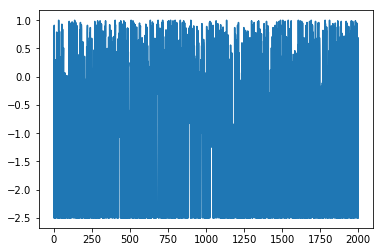

In [30]:
plt.plot(data['total_reward'])